In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis
from tqdm.notebook import tqdm

df1 = pd.read_csv('ShelvingIntensityRawData100A.csv')
ShelvingIntensityAverageArray1 = df1['ShelvingIntensityAverage100A'].tolist()
ShelvingIntensityUncertaintyArray1 = df1['ShelvingIntensityUncertainty100A'].tolist()
### -------------------------------------------- CLEAN DATA ---------------------------------------------- ###
ShelvingIntensityAverageArray_cleaned1 = np.delete(ShelvingIntensityAverageArray1, [11,22,33,44,55,66])
ShelvingIntensityUncertaintyArray_cleaned1 = np.delete(ShelvingIntensityUncertaintyArray1, [11,22,33,44,55,66])

df2 = pd.read_csv('ShelvingIntensityRawData75A.csv')
ShelvingIntensityAverageArray2 = df2['ShelvingIntensityAverage75A'].tolist()
ShelvingIntensityUncertaintyArray2 = df2['ShelvingIntensityUncertainty75A'].tolist()
### -------------------------------------------- CLEAN DATA ---------------------------------------------- ###
ShelvingIntensityAverageArray_cleaned2 = np.delete(ShelvingIntensityAverageArray2, [11,22,33,44,55,66])
ShelvingIntensityUncertaintyArray_cleaned2 = np.delete(ShelvingIntensityUncertaintyArray2, [11,22,33,44,55,66])

df3 = pd.read_csv('ShelvingIntensityRawData50A.csv')
ShelvingIntensityAverageArray3 = df3['ShelvingIntensityAverage50A'].tolist()
ShelvingIntensityUncertaintyArray3 = df3['ShelvingIntensityUncertainty50A'].tolist()
### -------------------- REPLACE SEVEN ANOMALOUS DATA POINTS WITH PLACEHOLDERS ZEROES -------------------- ###
ShelvingIntensityAverageArray3[25],ShelvingIntensityUncertaintyArray3[25] = 0,0
ShelvingIntensityAverageArray3[49],ShelvingIntensityUncertaintyArray3[49] = 0,0
ShelvingIntensityAverageArray3[61],ShelvingIntensityUncertaintyArray3[61] = 0,0
ShelvingIntensityAverageArray3[68],ShelvingIntensityUncertaintyArray3[68] = 0,0
ShelvingIntensityAverageArray3[69],ShelvingIntensityUncertaintyArray3[69] = 0,0
ShelvingIntensityAverageArray3[75],ShelvingIntensityUncertaintyArray3[75] = 0,0
ShelvingIntensityAverageArray3[76],ShelvingIntensityUncertaintyArray3[76] = 0,0
### -------------------------------------------- CLEAN DATA ---------------------------------------------- ###
ShelvingIntensityAverageArray_cleaned3 = np.delete(ShelvingIntensityAverageArray3, [11,22,33,44,55,66])
ShelvingIntensityUncertaintyArray_cleaned3 = np.delete(ShelvingIntensityUncertaintyArray3, [11,22,33,44,55,66])

In [3]:
### ---------------------- INITIALISE PLOTTING STYLE ---------------------- ###

## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# set_plotting_style()


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')


Initialising plotting style...
Success! Plotting style initialised.
Initialising plotting style...
Success! Plotting style initialised.


Text(0.5, 0, 'Frequency Detuning ($\\times$10$^3$ $\\Gamma_{red}$)')

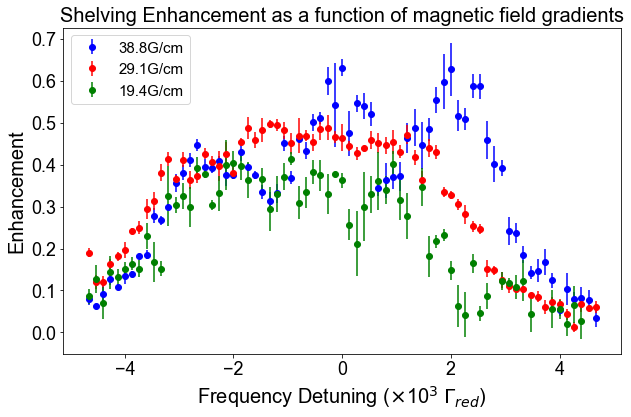

In [4]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

### ---------------------- FOR 50A ONLY: CLEAN MORE DATA ---------------------- ###

# Remove data points that correspond to the anomalous data points above with placeholders zeroes
FrequencyDetuning_deleted = np.delete(FrequencyDetuning, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
FrequencyDetuningGamma_deleted = np.delete(FrequencyDetuningGamma, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityAverageArray_cleaned3_deleted = np.delete(ShelvingIntensityAverageArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityUncertaintyArray_cleaned3_deleted = np.delete(ShelvingIntensityUncertaintyArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))

### ---------------------- PLOTTING CONTINUED ---------------------- ###

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuningGamma, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'38.8G/cm')
plt.errorbar(FrequencyDetuningGamma, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'29.1G/cm')
plt.errorbar(FrequencyDetuningGamma_deleted, ShelvingIntensityAverageArray_cleaned3_deleted, yerr=ShelvingIntensityUncertaintyArray_cleaned3_deleted, fmt='o', color='green',label=r'19.4G/cm')
plt.legend(loc='upper left')

plt.title('Shelving Enhancement as a function of magnetic field gradients')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning ($\times$10$^3$ $\Gamma_{red}$)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield.png', dpi=1200)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield.pdf',dpi=1200)

Text(0.5, 0, 'Frequency Detuning (MHz)')

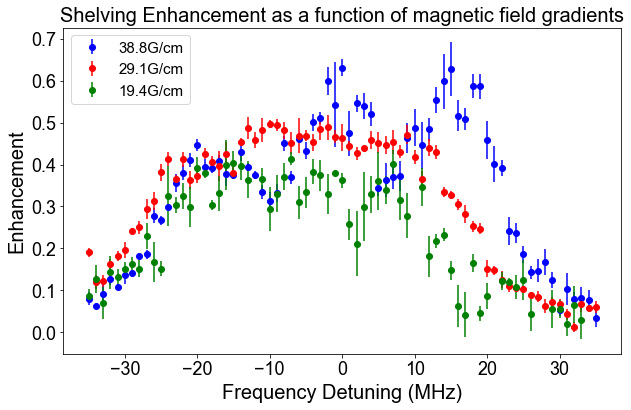

In [5]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

### ---------------------- FOR 50A ONLY: CLEAN MORE DATA ---------------------- ###

# Remove data points that correspond to the anomalous data points above with placeholders zeroes
FrequencyDetuning_deleted = np.delete(FrequencyDetuning, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
FrequencyDetuningGamma_deleted = np.delete(FrequencyDetuningGamma, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityAverageArray_cleaned3_deleted = np.delete(ShelvingIntensityAverageArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityUncertaintyArray_cleaned3_deleted = np.delete(ShelvingIntensityUncertaintyArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))

### ---------------------- PLOTTING CONTINUED ---------------------- ###

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'38.8G/cm')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'29.1G/cm')
plt.errorbar(FrequencyDetuning_deleted, ShelvingIntensityAverageArray_cleaned3_deleted, yerr=ShelvingIntensityUncertaintyArray_cleaned3_deleted, fmt='o', color='green',label=r'19.4G/cm')
plt.legend(loc='upper left')

plt.title('Shelving Enhancement as a function of magnetic field gradients')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning (MHz)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield2.png', dpi=1200)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield2.pdf',dpi=1200)

In [6]:
FrequencyDetuning

array([-35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23,
       -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,
        -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35], dtype=int64)

# Fitting

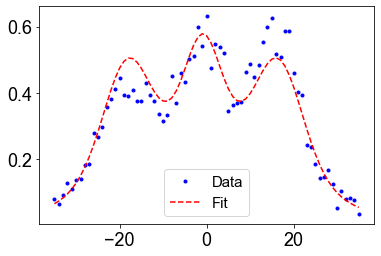

Fitted parameters:  [ 9.63449823 -0.86716643  2.38482062  5.41266182  8.7641582  17.33600976
  4.21491865  4.0792754 ]


In [19]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Voigt profile
def voigt(x, amp, mu, sigma, gamma):
    z = ((x - mu) + 1j*gamma) / (sigma * np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))

# Define a combination of three Voigt profiles: one central and two side ones
def combined_voigt(x, amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s):
    # Central Voigt profile
    central = voigt(x, amp_c, mu_c, sigma_c, gamma_c)
    # Side Voigt profiles (symmetrically placed)
    side_left = voigt(x, amp_s, mu_c - delta_s, sigma_s, gamma_s)
    side_right = voigt(x, amp_s, mu_c + delta_s, sigma_s, gamma_s)
    # Combine them
    return central + side_left + side_right

# Generate some synthetic data (for demonstration)
x_data1 = FrequencyDetuning
y_data = ShelvingIntensityAverageArray_cleaned1

# Initial guesses for fitting parameters: [amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s]
initial_guesses = [10.0, 0.0, 2.0, 5.0, 8.0, 20.0, 5.0, 5.0]

# Fit the combined Voigt profile to the data
popt1, pcov = curve_fit(combined_voigt, x_data1, y_data, p0=initial_guesses)

# Plot the result
plt.plot(x_data1, y_data, 'b.', label='Data')
plt.plot(x_data1, combined_voigt(x_data1, *popt1), 'r--', label='Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters: ", popt1)


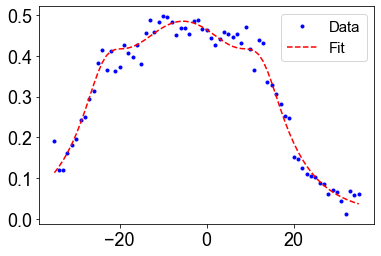

Fitted parameters:  [ 1.74651843e+01 -5.42311459e+00  1.31573171e+01  3.11877584e+00
  3.72142756e+00  1.80239249e+01  4.38679850e-03  6.56243391e+00]


In [20]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Voigt profile
def voigt(x, amp, mu, sigma, gamma):
    z = ((x - mu) + 1j*gamma) / (sigma * np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))

# Define a combination of three Voigt profiles: one central and two side ones
def combined_voigt(x, amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s):
    # Central Voigt profile
    central = voigt(x, amp_c, mu_c, sigma_c, gamma_c)
    # Side Voigt profiles (symmetrically placed)
    side_left = voigt(x, amp_s, mu_c - delta_s, sigma_s, gamma_s)
    side_right = voigt(x, amp_s, mu_c + delta_s, sigma_s, gamma_s)
    # Combine them
    return central + side_left + side_right

# Generate some synthetic data (for demonstration)
x_data2 = FrequencyDetuning
y_data = ShelvingIntensityAverageArray_cleaned2

# Initial guesses for fitting parameters: [amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s]
initial_guesses =  [10.0, -5.0, 1.0, 1.0, 10.0, 5.0, 1.0, 1.0]

# Fit the combined Voigt profile to the data
popt2, pcov = curve_fit(combined_voigt, x_data2, y_data, p0=initial_guesses)

# Plot the result
plt.plot(x_data2, y_data, 'b.', label='Data')
plt.plot(x_data2, combined_voigt(x_data2, *popt2), 'r--', label='Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters: ", popt2)


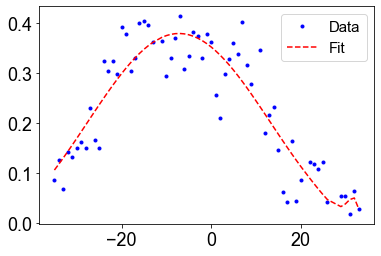

Fitted parameters:  [  12.33117344   -7.18010364   25.31710653  -18.05964651   -0.85849271
 -110.90468422  -11.82345465   71.98436083]


In [9]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Voigt profile
def voigt(x, amp, mu, sigma, gamma):
    z = ((x - mu) + 1j*gamma) / (sigma * np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))

# Define a combination of three Voigt profiles: one central and two side ones
def combined_voigt(x, amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s):
    # Central Voigt profile
    central = voigt(x, amp_c, mu_c, sigma_c, gamma_c)
    # Side Voigt profiles (symmetrically placed)
    side_left = voigt(x, amp_s, mu_c - delta_s, sigma_s, gamma_s)
    side_right = voigt(x, amp_s, mu_c + delta_s, sigma_s, gamma_s)
    # Combine them
    return central + side_left + side_right

# Generate some synthetic data (for demonstration)
x_data3 = FrequencyDetuning_deleted
y_data = ShelvingIntensityAverageArray_cleaned3_deleted

# Initial guesses for fitting parameters: [amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s]
initial_guesses = [0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 1.0, 0.1]

# Fit the combined Voigt profile to the data
popt3, pcov = curve_fit(combined_voigt, x_data3, y_data, p0=initial_guesses)

# Plot the result
plt.plot(x_data3, y_data, 'b.', label='Data')
plt.plot(x_data3, combined_voigt(x_data3, *popt3), 'r--', label='Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters: ", popt3)


Text(0.5, 0, 'Frequency Detuning (MHz)')

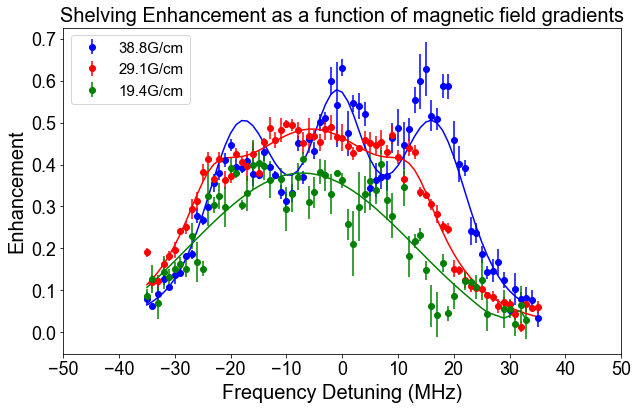

In [10]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

### ---------------------- FOR 50A ONLY: CLEAN MORE DATA ---------------------- ###

# Remove data points that correspond to the anomalous data points above with placeholders zeroes
FrequencyDetuning_deleted = np.delete(FrequencyDetuning, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
FrequencyDetuningGamma_deleted = np.delete(FrequencyDetuningGamma, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityAverageArray_cleaned3_deleted = np.delete(ShelvingIntensityAverageArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityUncertaintyArray_cleaned3_deleted = np.delete(ShelvingIntensityUncertaintyArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))

### ---------------------- PLOTTING CONTINUED ---------------------- ###

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'38.8G/cm')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'29.1G/cm')
plt.errorbar(FrequencyDetuning_deleted, ShelvingIntensityAverageArray_cleaned3_deleted, yerr=ShelvingIntensityUncertaintyArray_cleaned3_deleted, fmt='o', color='green',label=r'19.4G/cm')
plt.legend(loc='upper left')

plt.plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt1), 'b-')
plt.plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt2), 'r-')
plt.plot(FrequencyDetuning_deleted, combined_voigt(FrequencyDetuning_deleted, *popt3), 'g-')

plt.legend(loc='upper left')

plt.xticks(np.arange(-50, 51, 10))
plt.title('Shelving Enhancement as a function of magnetic field gradients')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning (MHz)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield2Fitted.png', dpi=1200)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield2Fitted.pdf',dpi=1200)

Text(0.5, 0, 'Frequency Detuning (MHz)')

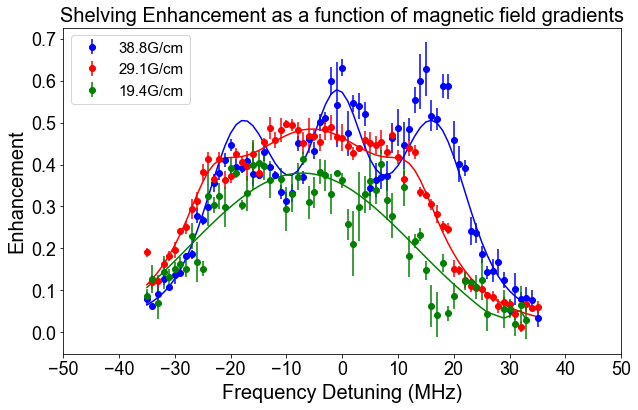

In [23]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

### ---------------------- FOR 50A ONLY: CLEAN MORE DATA ---------------------- ###

# Remove data points that correspond to the anomalous data points above with placeholders zeroes
FrequencyDetuning_deleted = np.delete(FrequencyDetuning, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
FrequencyDetuningGamma_deleted = np.delete(FrequencyDetuningGamma, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityAverageArray_cleaned3_deleted = np.delete(ShelvingIntensityAverageArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))
ShelvingIntensityUncertaintyArray_cleaned3_deleted = np.delete(ShelvingIntensityUncertaintyArray_cleaned3, np.where(ShelvingIntensityAverageArray_cleaned3 == 0))

### ---------------------- PLOTTING CONTINUED ---------------------- ###

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'38.8G/cm')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'29.1G/cm')
plt.errorbar(FrequencyDetuning_deleted, ShelvingIntensityAverageArray_cleaned3_deleted, yerr=ShelvingIntensityUncertaintyArray_cleaned3_deleted, fmt='o', color='green',label=r'19.4G/cm')
plt.legend(loc='upper left')

plt.plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt1), 'b-')
plt.plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt2), 'r-')
plt.plot(FrequencyDetuning_deleted, combined_voigt(FrequencyDetuning_deleted, *popt3), 'g-')

plt.legend(loc='upper left')

plt.xticks(np.arange(-50, 51, 10))
plt.title('Shelving Enhancement as a function of magnetic field gradients')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning (MHz)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield2Fitted.png', dpi=1200)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuningVsBfield2Fitted.pdf',dpi=1200)



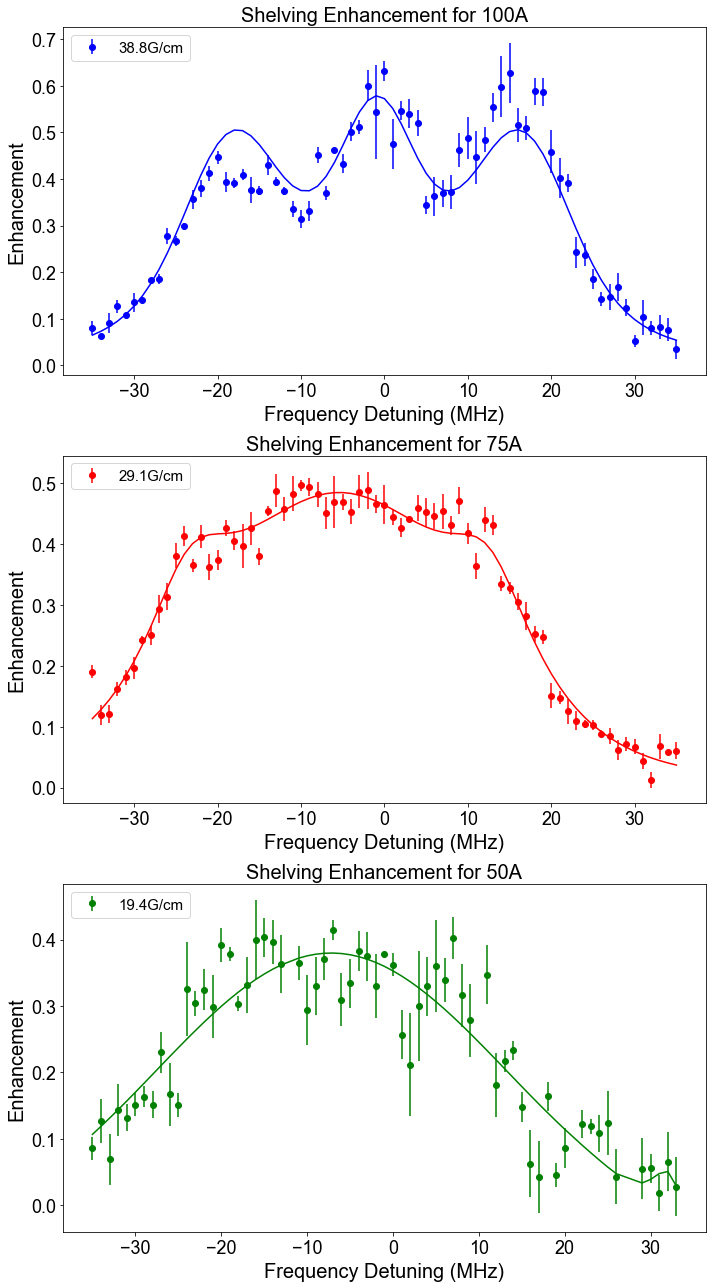

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot for 100A
axs[0].errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o', color='blue', label=r'38.8G/cm')
axs[0].plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt1), 'b-')
axs[0].set_title('Shelving Enhancement for 100A')
axs[0].set_ylabel(r'Enhancement')
axs[0].set_xlabel(r'Frequency Detuning (MHz)')
axs[0].legend(loc='upper left')

# Plot for 75A
axs[1].errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'29.1G/cm')
axs[1].plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt2), 'r-')
axs[1].set_title('Shelving Enhancement for 75A')
axs[1].set_ylabel(r'Enhancement')
axs[1].set_xlabel(r'Frequency Detuning (MHz)')
axs[1].legend(loc='upper left')

# Plot for 50A
axs[2].errorbar(FrequencyDetuning_deleted, ShelvingIntensityAverageArray_cleaned3_deleted, yerr=ShelvingIntensityUncertaintyArray_cleaned3_deleted, fmt='o', color='green', label=r'19.4G/cm')
axs[2].plot(FrequencyDetuning_deleted, combined_voigt(FrequencyDetuning_deleted, *popt3), 'g-')
axs[2].set_title('Shelving Enhancement for 50A')
axs[2].set_ylabel(r'Enhancement')
axs[2].set_xlabel(r'Frequency Detuning (MHz)')
axs[2].legend(loc='upper left')

plt.tight_layout()
plt.show()